In [19]:
# Hàm hiển thị ảnh
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off')  # Bỏ trục (hoặc bỏ dòng này nếu bạn muốn giữ trục)

### Các phép toán trên ảnh nhị phân

### Co ảnh

<Figure size 640x480 with 0 Axes>

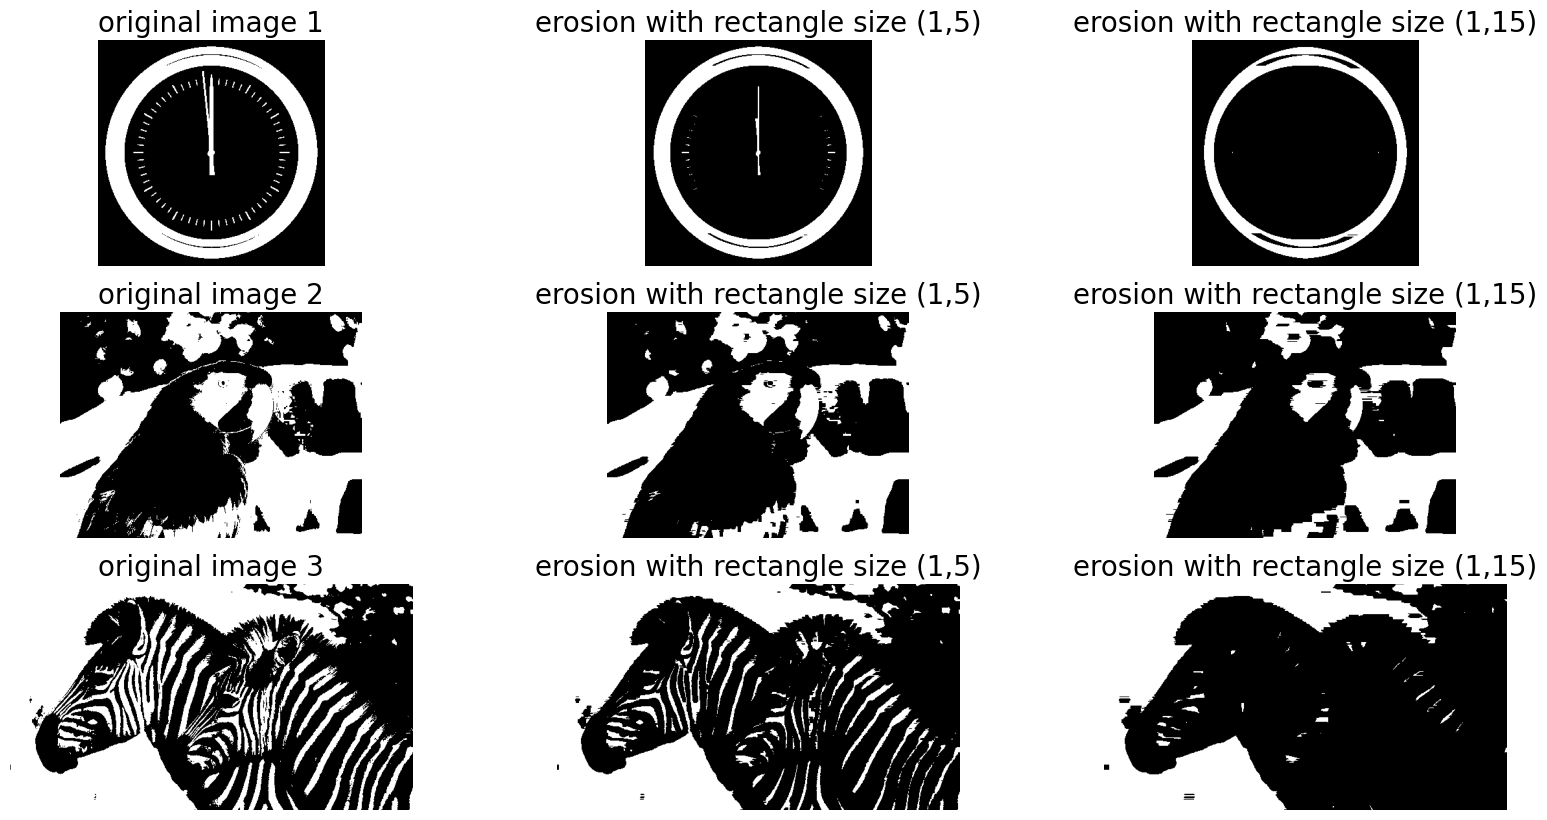

In [20]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle


# Đọc và chuyển đổi ba ảnh khác nhau thành ảnh nhị phân
images = [
    rgb2gray(imread('../images/clock2.jpg')),
    rgb2gray(imread('../images/parrot.png')),
    rgb2gray(imread('../images/zebras.jpg'))
]

for im in images:
    im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
    im[im > 0.5] = 1

# Hiển thị các ảnh ban đầu
pylab.gray()
pylab.figure(figsize=(20, 10))

# Xử lý từng ảnh và hiển thị kết quả
for i, im in enumerate(images):
    pylab.subplot(3, 3, i * 3 + 1), plot_image(im, f'original image {i+1}')
    
    # Erosion với phần tử cấu trúc rectangle(1,5)
    im1 = binary_erosion(im, rectangle(1, 5))
    pylab.subplot(3, 3, i * 3 + 2), plot_image(im1, f'erosion with rectangle size (1,5)')
    
    # Erosion với phần tử cấu trúc rectangle(1,15)
    im2 = binary_erosion(im, rectangle(1, 15))
    pylab.subplot(3, 3, i * 3 + 3), plot_image(im2, f'erosion with rectangle size (1,15)')

# Hiển thị kết quả
pylab.show()


### Giãn ảnh

<Figure size 640x480 with 0 Axes>

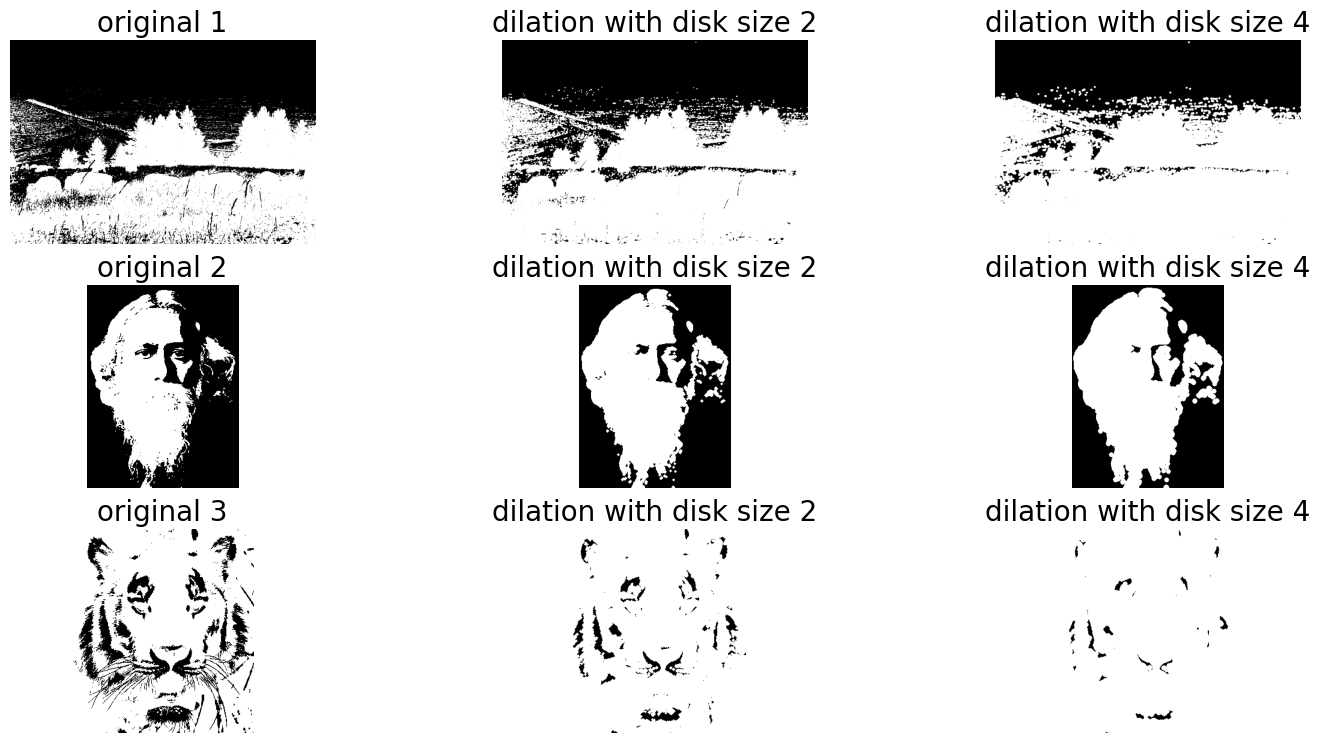

In [21]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
import matplotlib.pylab as pylab
from skimage.io import imread

# Đọc ba ảnh khác nhau
image_paths = ['../images/bisons.jpg', '../images/tagore.png', '../images/tiger3.jpg']
images = [img_as_float(imread(img_path)) for img_path in image_paths]

# Cấu hình hiển thị
pylab.gray()
pylab.figure(figsize=(18, 9))

for idx, im in enumerate(images):
    # Chuyển ảnh sang ảnh nhị phân (với ngưỡng 0.5)
    if im.ndim == 3:  # Nếu là ảnh RGB hoặc RGBA
        im = 1 - im[..., -1]  # Giả sử ảnh có kênh alpha ở cuối
    im[im <= 0.5] = 0
    im[im > 0.5] = 1
    
    # Hiển thị ảnh gốc
    pylab.subplot(3, 3, idx*3 + 1)
    pylab.imshow(im)
    pylab.title(f'original {idx+1}', size=20)
    pylab.axis('off')
    
    # Áp dụng phép giãn ảnh với các kích thước khác nhau của phần tử cấu trúc
    for d in range(1, 3):
        pylab.subplot(3, 3, idx*3 + d + 1)
        im1 = binary_dilation(im, disk(2*d))  # Phép giãn với disk có kích thước thay đổi
        pylab.imshow(im1)
        pylab.title(f'dilation with disk size {2*d}', size=20)
        pylab.axis('off')

pylab.show()


### Mở và đóng ảnh

<Figure size 640x480 with 0 Axes>

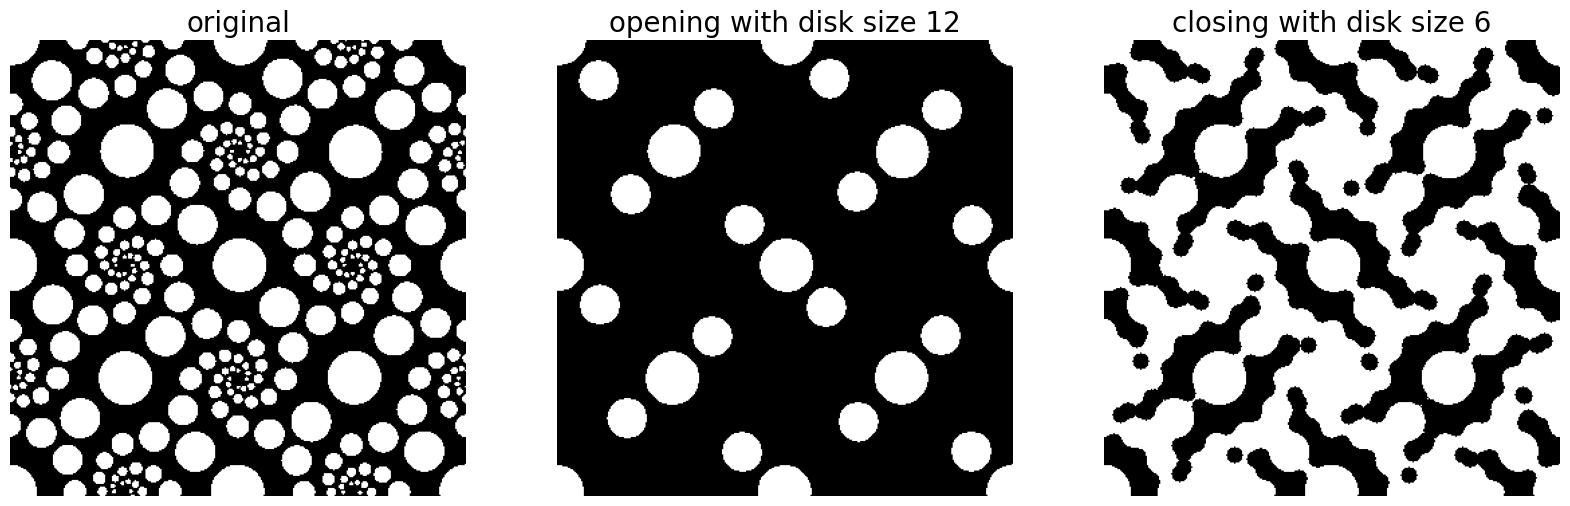

In [22]:
from skimage.morphology import binary_opening, binary_closing, disk

im = rgb2gray(imread('../images/circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_opening(im, disk(12))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_closing(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(6))
pylab.show()

### Skeletonizing

<Figure size 640x480 with 0 Axes>

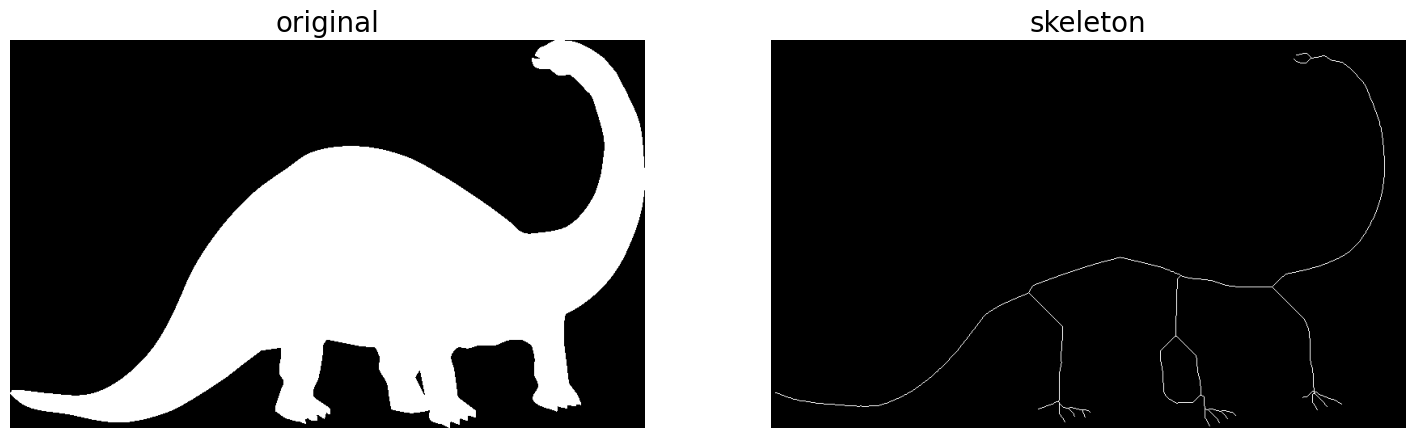

In [23]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

from skimage.morphology import skeletonize
im = img_as_float(imread('../images/dynasaur.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

<Figure size 640x480 with 0 Axes>

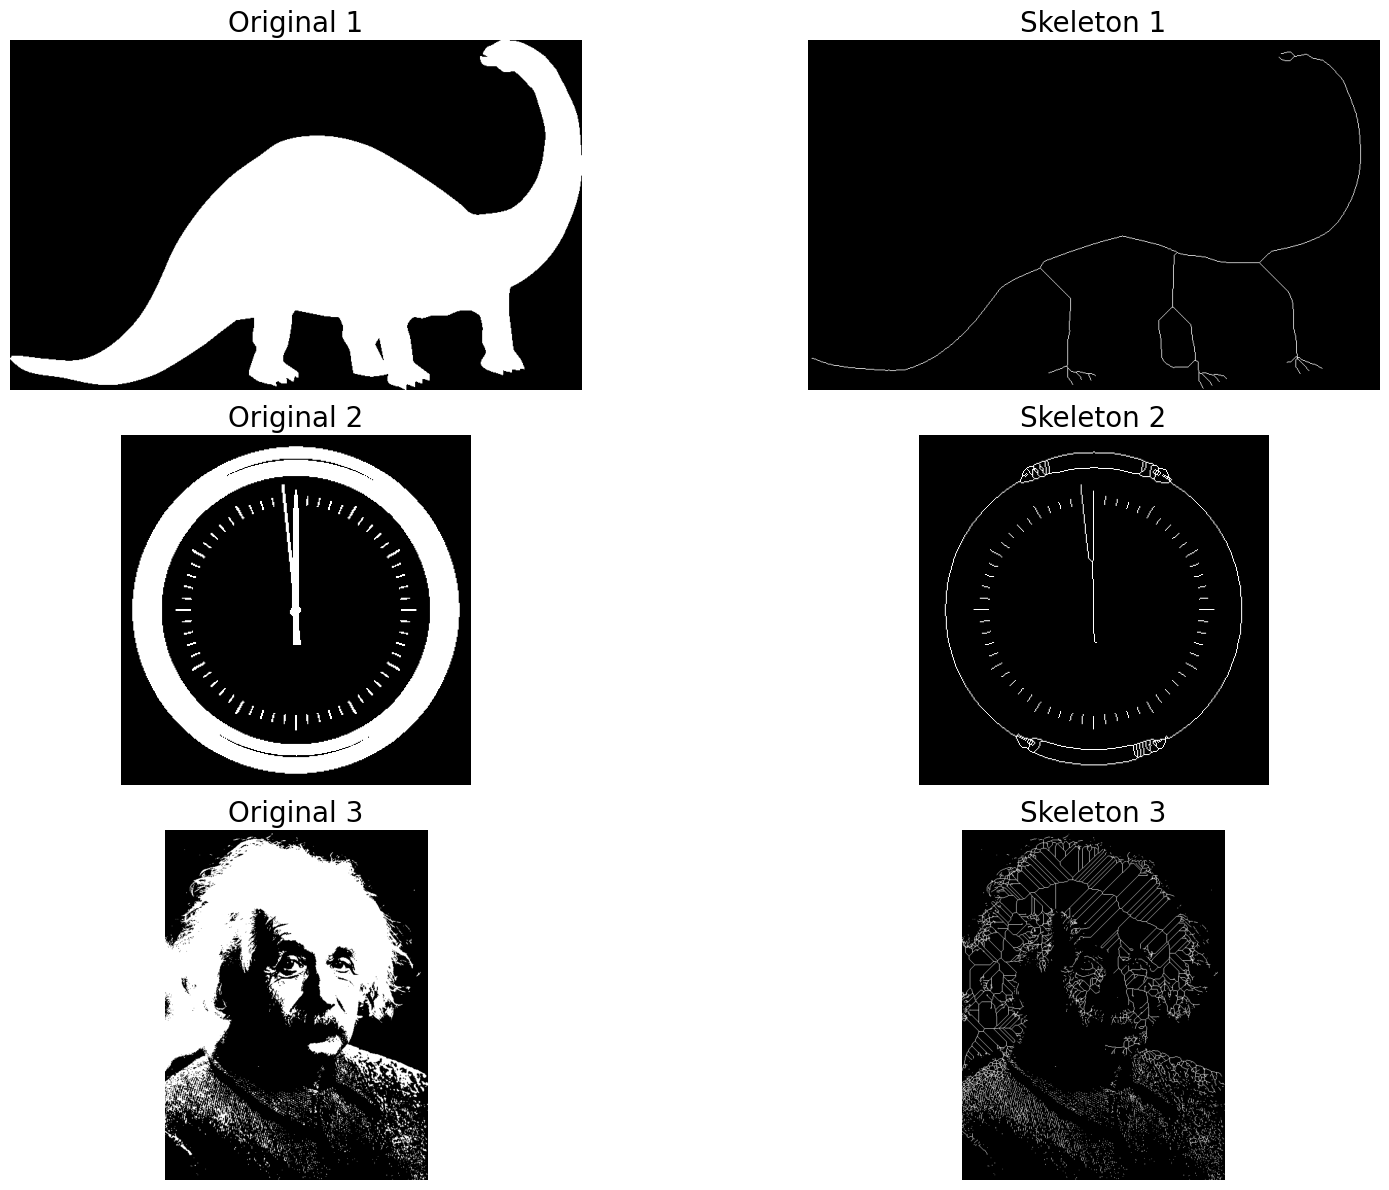

In [24]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import skeletonize
import matplotlib.pylab as pylab
from skimage import img_as_float

image_paths = [
    '../images/dynasaur.png',
    '../images/clock2.jpg',
    '../images/einstein.jpg'
]

pylab.gray()
pylab.figure(figsize=(18, 12)) 

for idx, img_path in enumerate(image_paths):
    # Đọc ảnh và chuyển thành nhị phân
    im = img_as_float(imread(img_path))
    
    # Nếu ảnh có kênh alpha (ví dụ: ảnh PNG), chọn kênh alpha làm đầu vào
    if im.ndim == 3 and im.shape[-1] == 4:
        im = im[..., 3]
    elif im.ndim == 3:  # Chuyển RGB sang ảnh xám nếu không có alpha
        im = rgb2gray(im)

    im[im <= 0.5] = 0
    im[im > 0.5] = 1

    skeleton = skeletonize(im)

    pylab.subplot(len(image_paths), 2, 2 * idx + 1)
    plot_image(im, f'Original {idx + 1}')
    pylab.subplot(len(image_paths), 2, 2 * idx + 2)
    plot_image(skeleton, f'Skeleton {idx + 1}')

pylab.tight_layout()  # Tự động căn chỉnh khoảng cách
pylab.show()


### Tính toán bao lồi

<Figure size 640x480 with 0 Axes>

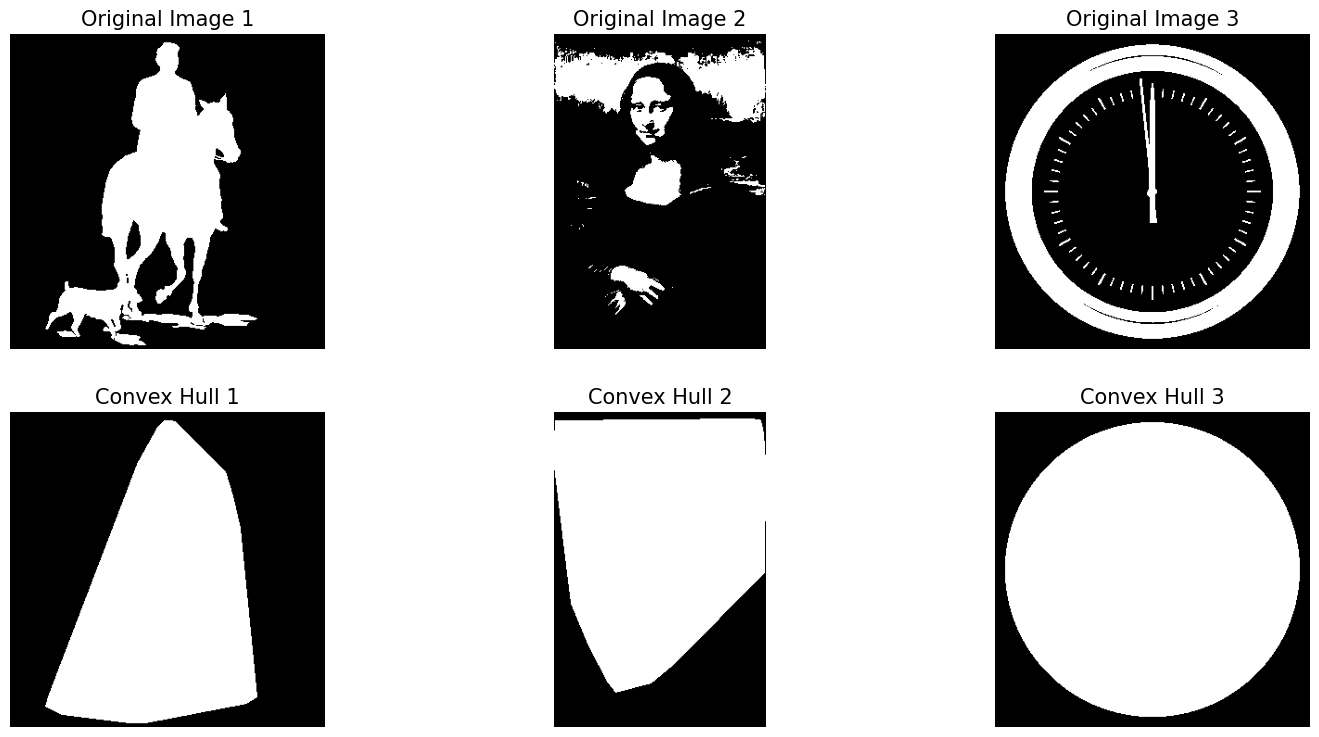

In [25]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import convex_hull_image
import matplotlib.pylab as pylab

# Hàm hiển thị các ảnh trong một hình
def plot_images_together(original_images, convex_hull_images, titles, sz=(18, 9)):
    pylab.gray()
    pylab.figure(figsize=sz)
    n = len(original_images)
    
    for i in range(n):
        pylab.subplot(2, n, i + 1)
        pylab.imshow(original_images[i])
        pylab.title(titles[i], size=15)
        pylab.axis('off')
        
        pylab.subplot(2, n, n + i + 1)
        pylab.imshow(convex_hull_images[i])
        pylab.title(f'Convex Hull {i + 1}', size=15)
        pylab.axis('off')
    
    pylab.show()

image_paths = [
    '../images/horse-dog.jpg',
    '../images/monalisa.jpg',
    '../images/clock2.jpg'
]

original_images = []
convex_hull_images = []

for path in image_paths:
    im = imread(path)
    if im.shape[-1] == 4:  # Kiểm tra nếu ảnh có 4 kênh (RGBA)
        im = im[..., :3]  # Lấy chỉ 3 kênh RGB
    im = rgb2gray(im)
    threshold = 0.5
    im[im < threshold] = 0
    im[im >= threshold] = 1
    chull = convex_hull_image(im)
    original_images.append(im)
    convex_hull_images.append(chull)

titles = ['Original Image 1', 'Original Image 2', 'Original Image 3']
plot_images_together(original_images, convex_hull_images, titles, sz=(18, 9))


### Trích xuất biên ảnh

<Figure size 640x480 with 0 Axes>

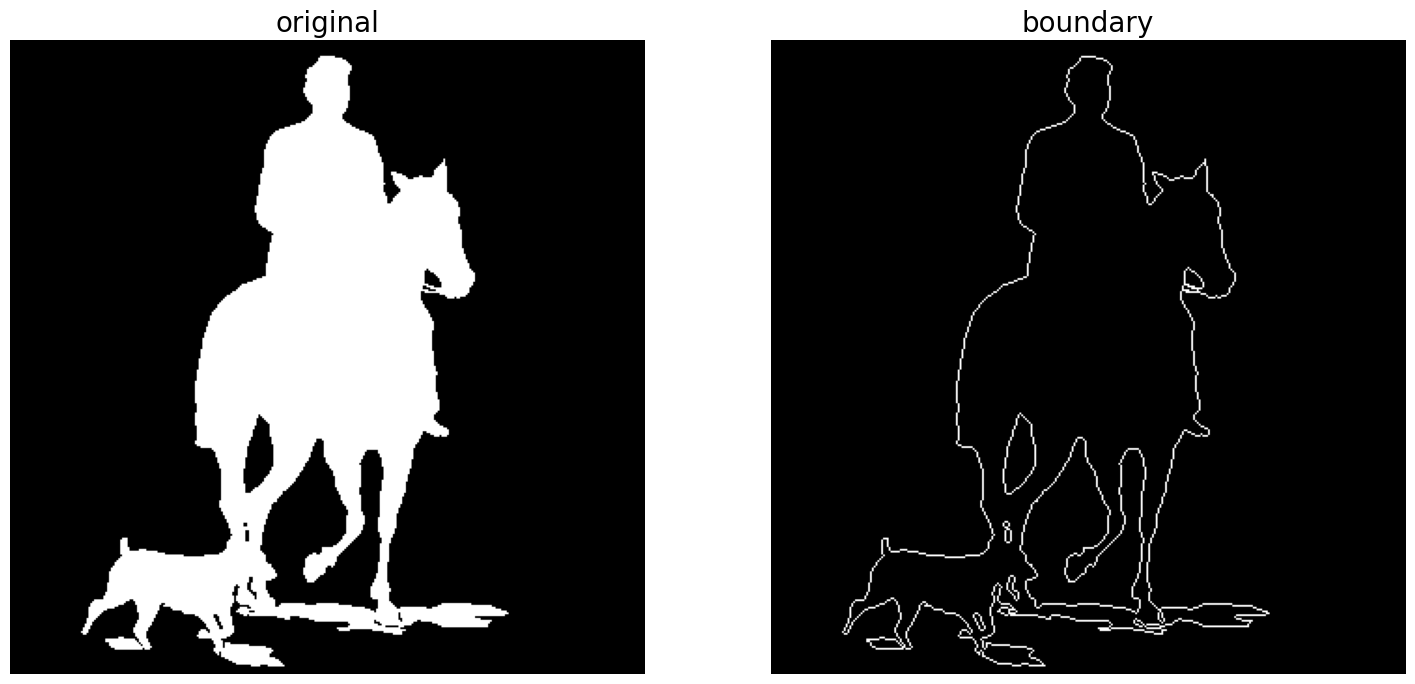

In [26]:
from skimage.morphology import binary_erosion
im = rgb2gray(imread('../images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0
im[im >= threshold] = 1
boundary = im - binary_erosion(im)
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))

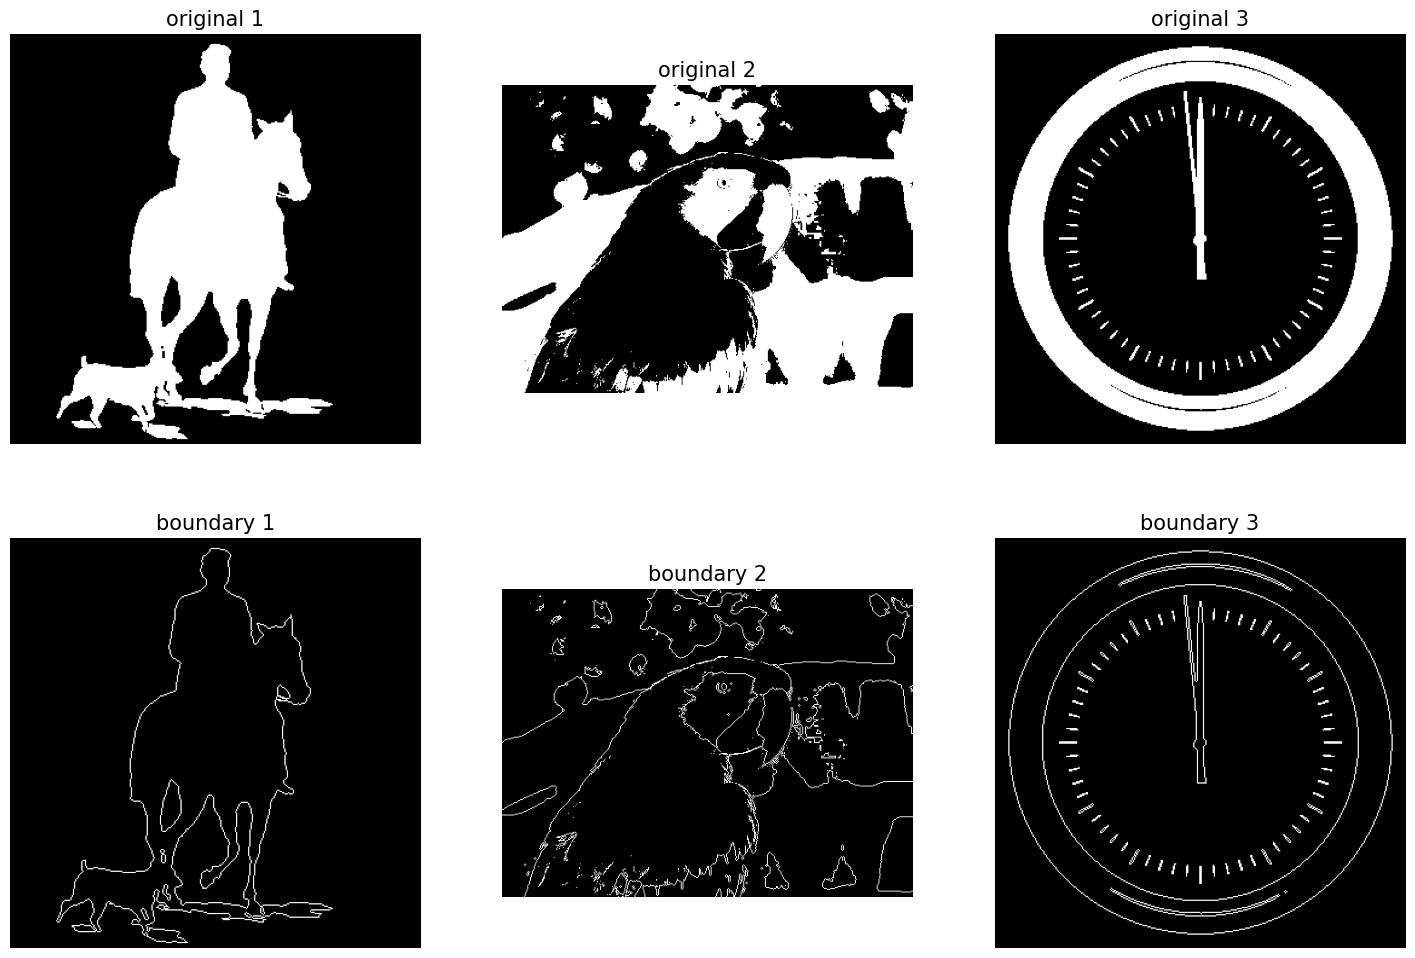

In [27]:
from skimage.morphology import binary_erosion
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pylab as pylab

image_paths = ['../images/horse-dog.jpg', '../images/parrot.jpg', '../images/clock2.jpg']
pylab.figure(figsize=(18, 12))

# Xử lý từng ảnh đầu vào
for idx, path in enumerate(image_paths):
    im = rgb2gray(imread(path))
    threshold = 0.5
    im[im < threshold] = 0
    im[im >= threshold] = 1
    boundary = im - binary_erosion(im)
    
    pylab.subplot(2, 3, idx + 1)
    pylab.imshow(im, cmap='gray')
    pylab.title(f'original {idx+1}', size=15)
    pylab.axis('off')
    
    pylab.subplot(2, 3, idx + 4)
    pylab.imshow(boundary, cmap='gray')
    pylab.title(f'boundary {idx+1}', size=15)
    pylab.axis('off')
pylab.show()

### Các phép toán trên ảnh xám

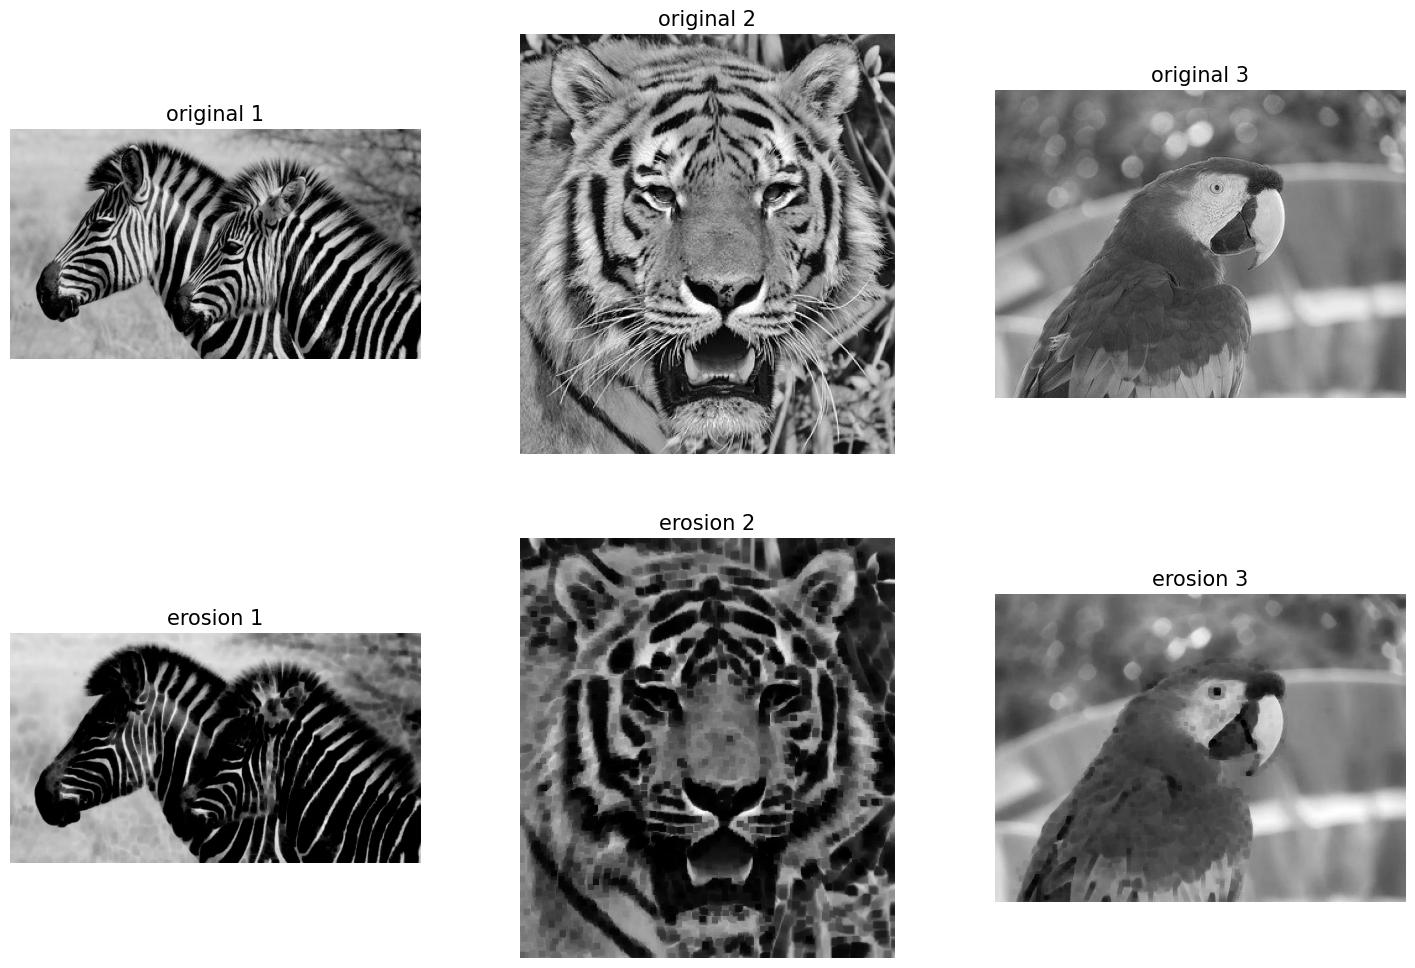

In [28]:
from skimage.morphology import erosion, square
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pylab as pylab

image_paths = ['../images/zebras.jpg', '../images/tiger3.jpg', '../images/parrot.png']
pylab.figure(figsize=(18, 12))
struct_elem = square(5)
for idx, path in enumerate(image_paths):
    im = rgb2gray(imread(path))  # Chuyển ảnh thành ảnh xám
    eroded = erosion(im, struct_elem) # Phép co
    pylab.subplot(2, 3, idx + 1)
    pylab.imshow(im, cmap='gray')
    pylab.title(f'original {idx+1}', size=15)
    pylab.axis('off')
    pylab.subplot(2, 3, idx + 4)
    pylab.imshow(eroded, cmap='gray')
    pylab.title(f'erosion {idx+1}', size=15)
    pylab.axis('off')
pylab.show()

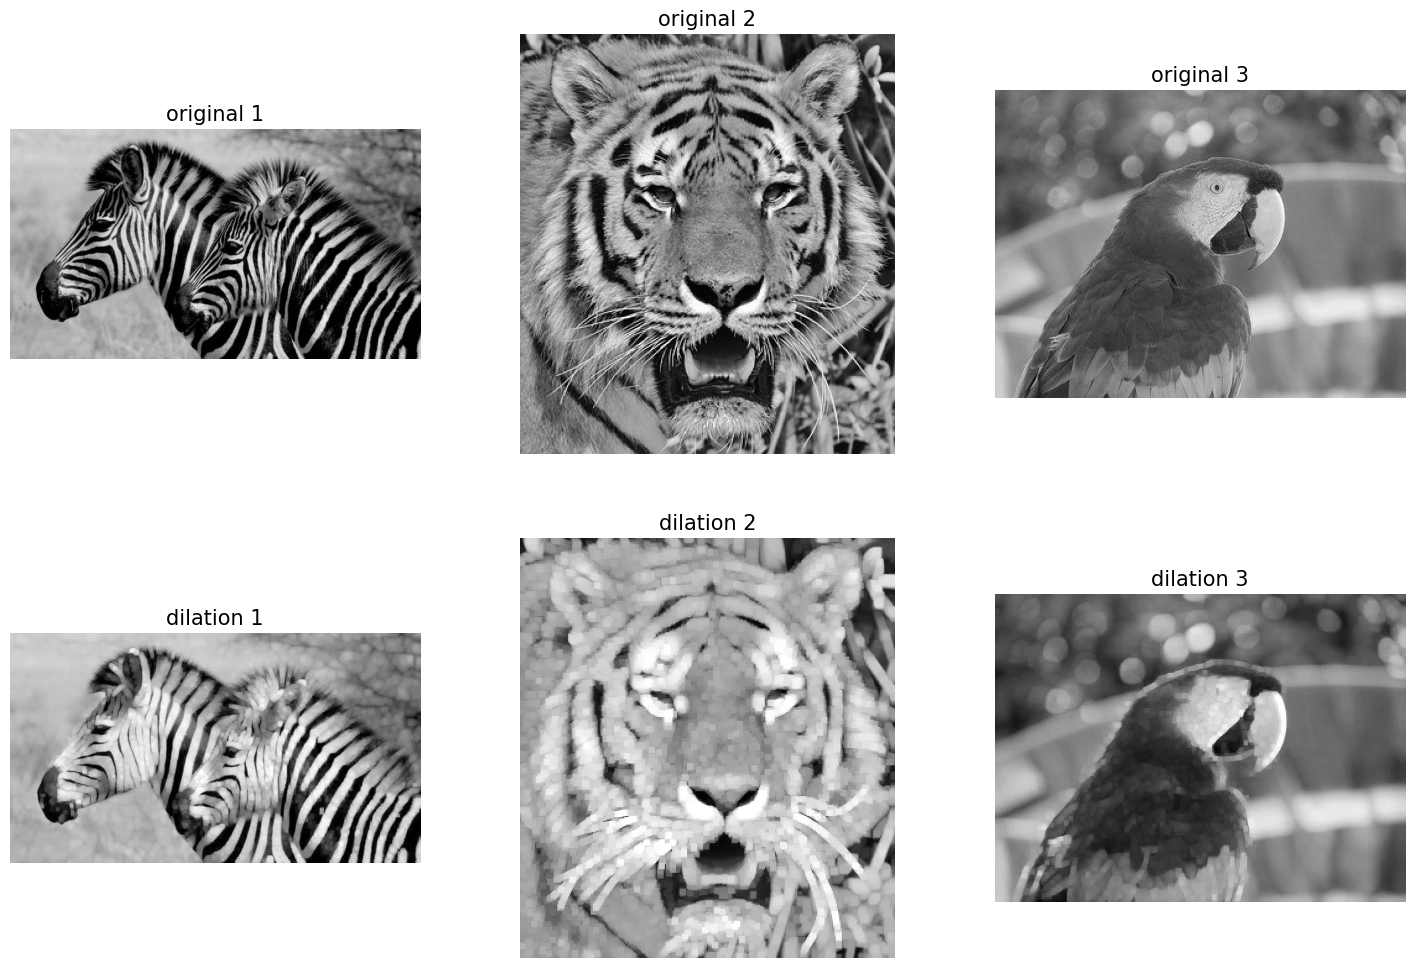

In [29]:
from skimage.morphology import dilation, square
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pylab as pylab

image_paths = ['../images/zebras.jpg', '../images/tiger3.jpg', '../images/parrot.png']
pylab.figure(figsize=(18, 12))
struct_elem = square(5)

for idx, path in enumerate(image_paths):
    im = rgb2gray(imread(path))  # Chuyển ảnh thành ảnh xám
    dilated = dilation(im, struct_elem) # Phép giãn
    pylab.subplot(2, 3, idx + 1)
    pylab.imshow(im, cmap='gray')
    pylab.title(f'original {idx+1}', size=15)
    pylab.axis('off')
    pylab.subplot(2, 3, idx + 4)
    pylab.imshow(dilated, cmap='gray')
    pylab.title(f'dilation {idx+1}', size=15)
    pylab.axis('off')

pylab.show()

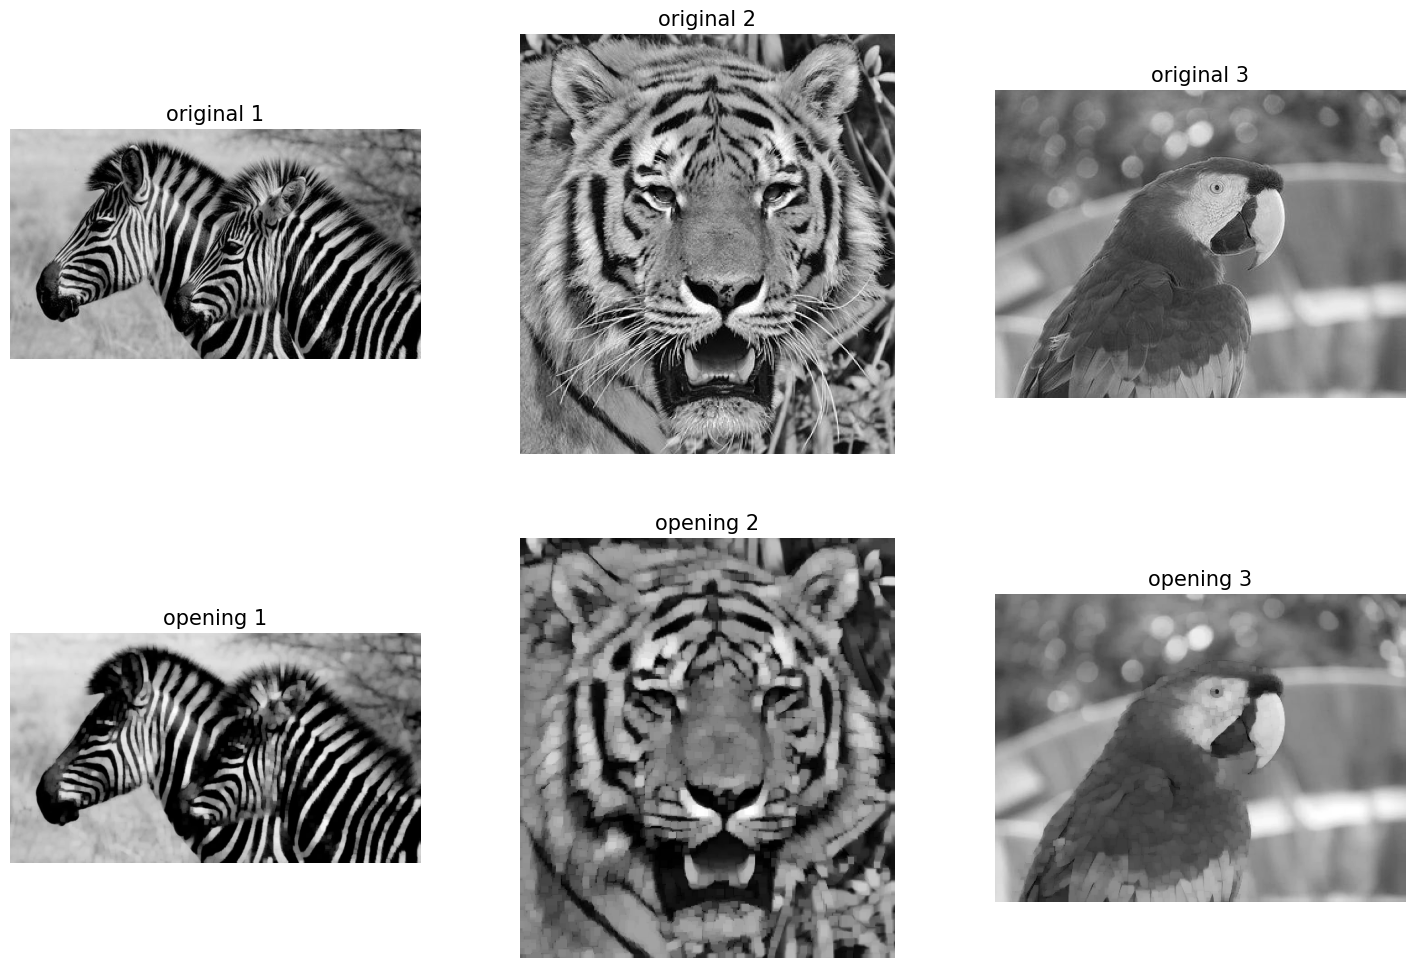

In [30]:
from skimage.morphology import opening, square
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pylab as pylab

image_paths = ['../images/zebras.jpg', '../images/tiger3.jpg', '../images/parrot.png']
pylab.figure(figsize=(18, 12))
struct_elem = square(5)

for idx, path in enumerate(image_paths):
    im = rgb2gray(imread(path))  # Chuyển ảnh thành ảnh xám
    opened = opening(im, struct_elem)  # Phép mở
    pylab.subplot(2, 3, idx + 1)
    pylab.imshow(im, cmap='gray')
    pylab.title(f'original {idx+1}', size=15)
    pylab.axis('off')
    pylab.subplot(2, 3, idx + 4)
    pylab.imshow(opened, cmap='gray')
    pylab.title(f'opening {idx+1}', size=15)
    pylab.axis('off')
pylab.show()

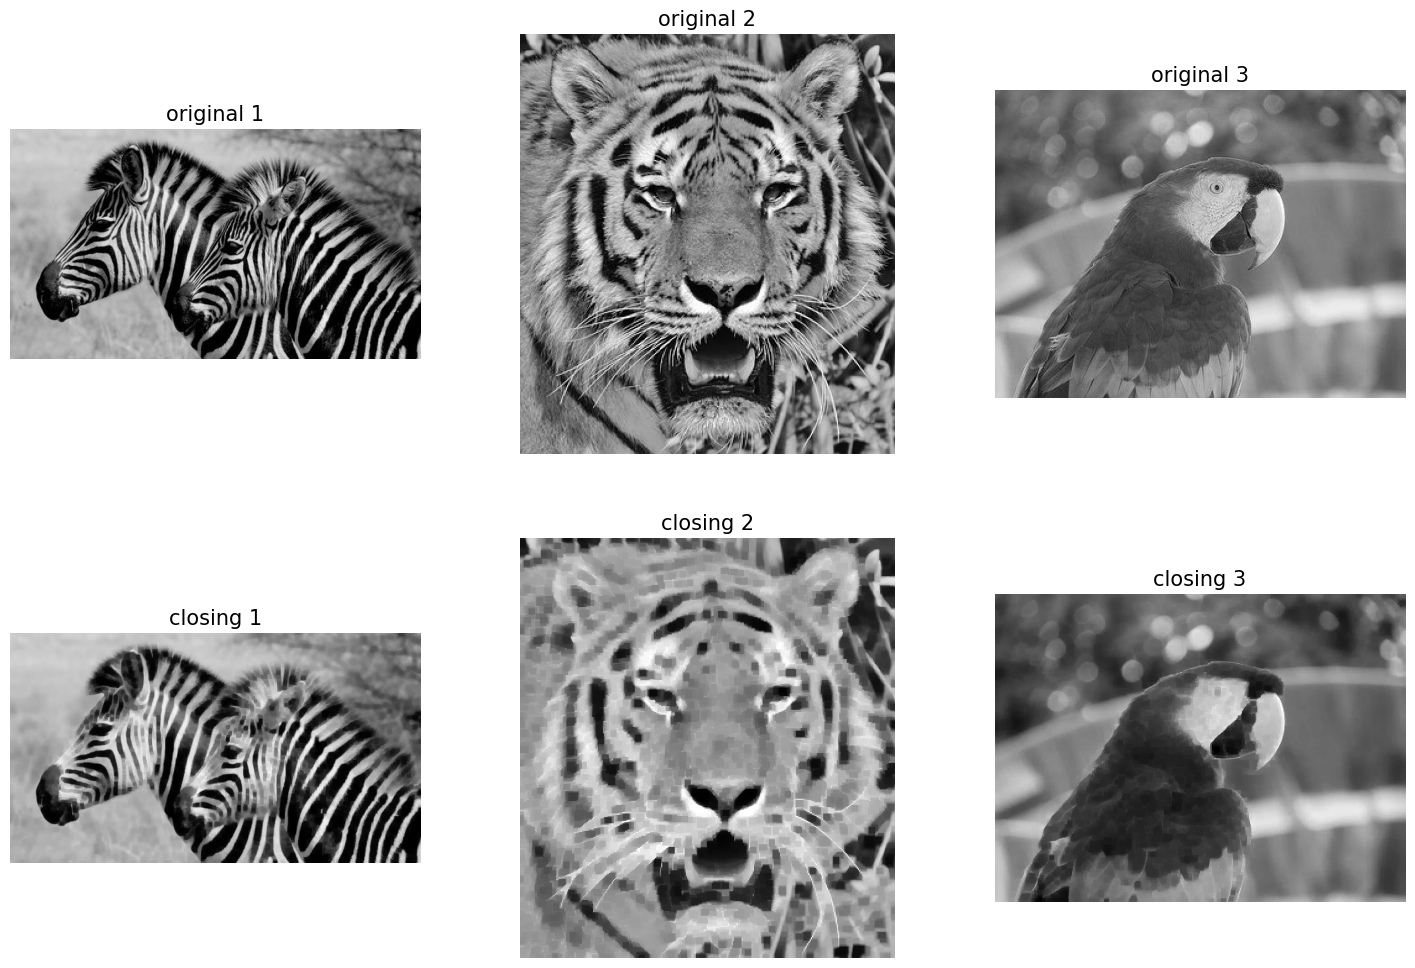

In [31]:
from skimage.morphology import closing, square
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pylab as pylab

image_paths = ['../images/zebras.jpg', '../images/tiger3.jpg', '../images/parrot.png']
pylab.figure(figsize=(18, 12))
struct_elem = square(5)

for idx, path in enumerate(image_paths):
    im = rgb2gray(imread(path))  # Chuyển ảnh thành ảnh xám
    closed = closing(im, struct_elem)  # Phép đóng
    pylab.subplot(2, 3, idx + 1)
    pylab.imshow(im, cmap='gray')
    pylab.title(f'original {idx+1}', size=15)
    pylab.axis('off')
    pylab.subplot(2, 3, idx + 4)
    pylab.imshow(closed, cmap='gray')
    pylab.title(f'closing {idx+1}', size=15)
    pylab.axis('off')

pylab.show()